In [13]:
import argparse
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.optim import lr_scheduler
from oxford_pet import *
from models.resnet34_unet import *
from models.unet import *
from utils import *

Data shape: (130,)


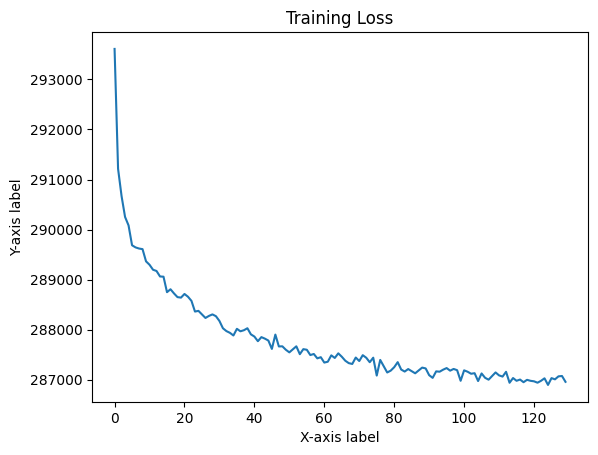

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 載入 .npy 檔案
file_path1 = "../saved_models/U/U_loss_final.npy"
data1 = np.load(file_path1)
# 檢查數據的形狀
print("Data shape:", data1.shape)

# 畫圖
plt.plot(data1)
plt.title('Training Loss')
plt.xlabel('X-axis label',)
#plt.xticks(np.arange(10), np.arange(1, 11))
plt.ylabel('Y-axis label')
plt.show()

Data shape: (130,)


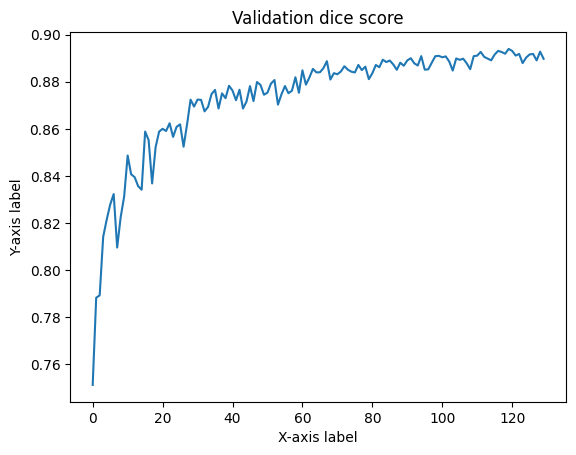

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 載入 .npy 檔案
file_path1 = "../saved_models/U/U_dice_score_final.npy"
data1 = np.load(file_path1)
# 檢查數據的形狀
print("Data shape:", data1.shape)

# 畫圖
plt.plot(data1)
plt.title('Validation dice score')
plt.xlabel('X-axis label',)
#plt.xticks(np.arange(10), np.arange(1, 11))
plt.ylabel('Y-axis label')
plt.show()

Data shape: (200,)


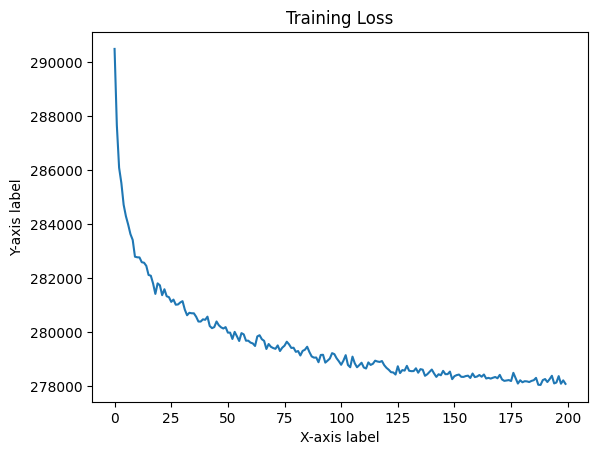

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 載入 .npy 檔案
# file_path1 = "../saved_models/R/R_loss_100.npy"
# data1 = np.load(file_path1)
file_path2 = "../saved_models/R/R_loss_200.npy"
data2 = np.load(file_path2)

# 檢查數據的形狀
#print("Data shape:", data1.shape)
print("Data shape:", data2.shape)


#combined_data = np.concatenate((data1, data2))
np.save(f"../saved_models/R/R_loss_200.npy", data2)
# 畫圖
plt.plot(data2)
plt.title('Training Loss')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
#plt.xticks(np.arange(21), np.arange(1, 21))
plt.show()


Data shape: (200,)


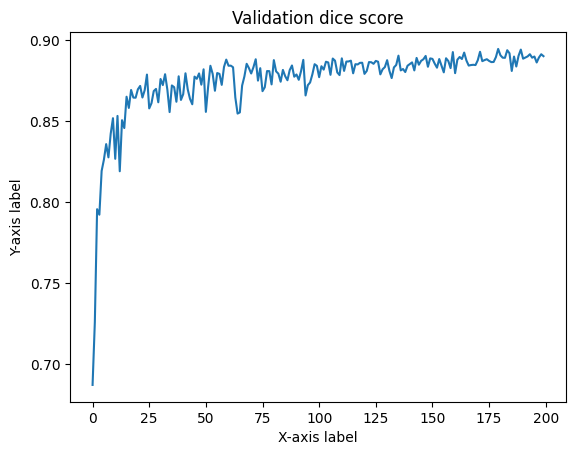

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 載入 .npy 檔案
# file_path1 = "../saved_models/R/R_dice_score_100.npy"
# data1 = np.load(file_path1)
file_path2 = "../saved_models/R/R_dice_score_200.npy"
data2 = np.load(file_path2)


# 檢查數據的形狀
#print("Data shape:", data1.shape)
print("Data shape:", data2.shape)

#combined_data = np.concatenate((data1, data2))
np.save(f"../saved_models/R/R_dice_score_200.npy", data2)
# 畫圖
plt.plot(data2)
plt.title('Validation dice score')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.show()

In [23]:
import argparse
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.optim import lr_scheduler
from oxford_pet import *
from models.resnet34_unet import *
from models.unet import *
from utils import *
from evaluate import *

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ResNet34_UNet()
model = model.to(device)

for x in range(200,205,5):
    checkpoint = torch.load((f"../saved_models/R/R_epoch_{x}.pth"))
    model.load_state_dict(checkpoint['model_state_dict'])
    test_loader = DataLoader(load_dataset('../dataset', "test"), batch_size=16, shuffle=False)
    dice = evaluate(model, test_loader , device)
    print(f"Epoch : {x} , Dice Score: {dice:.6f}")

100%|██████████| 230/230 [00:27<00:00,  8.44it/s]

Epoch : 200 , Dice Score: 0.904748


In [32]:
import argparse
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.optim import lr_scheduler
from oxford_pet import *
from models.resnet34_unet import *
from models.unet import *
from utils import *
from evaluate import *

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = UNet()
model = model.to(device)

for x in range(120,125,5):
    checkpoint = torch.load((f"../saved_models/U/U_epoch_{x}.pth"))
    model.load_state_dict(checkpoint['model_state_dict'])
    test_loader = DataLoader(load_dataset('../dataset', "test"), batch_size=16, shuffle=False)
    dice = evaluate(model, test_loader , device)
    print(f"Epoch : {x} , Dice Score: {dice:.6f}")

100%|██████████| 230/230 [00:54<00:00,  4.21it/s]

Epoch : 120 , Dice Score: 0.900357
